In [16]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from mpl_panel_builder.panel_builder import PanelBuilder

# Ensures that the notebook reloads modules automatically before executing code
# This is useful for development purposes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PanelConfig Configuration Reference

Required Fields:
panel_dimensions (PanelDimensions): Overall panel dimensions
  width_cm (float): Width dimension in centimeters
  height_cm (float): Height dimension in centimeters
panel_margins (PanelMargins): Panel margin sizes
  top_cm (float): Top margin in centimeters
  bottom_cm (float): Bottom margin in centimeters
  left_cm (float): Left margin in centimeters
  right_cm (float): Right margin in centimeters

Optional Fields (with defaults):
style (StyleConfig): Styling configuration with theme support and rcParams
  theme (str): Theme name: 'white' or 'none' [default: none]
  rc_params (dict): Custom rcParams that override theme defaults
axes_separation (AxesSpacing): Separation between adjacent axes
  x_cm (float): Horizontal spacing between adjacent axes in centimeters [default: 0.0]
  y_cm (float): Vertical spacing between adjacent axes in centimeters [default: 0.0]
scalebar_config (ScaleBar): Scale bar configuration
  separation_cm (floa

In [20]:
# 1. Define the configuration
config = {
    # Required keys:
    "panel_dimensions": {
        "width_cm": 10.0,   # 8 cm wide
        "height_cm": 10.0,  # 6 cm tall
    },
    "panel_margins": {
        "top_cm": 1.5,
        "bottom_cm": 1.5,
        "left_cm": 1.5,
        "right_cm": 1.5,
    },
    "style": {
        "theme": "white",
        "rc_params": {
            "axes.facecolor": "none",
        }
    },
    # Optional keys:
    "panel_output": {
        "directory": Path(os.getcwd()),  # Where to save the panel
        "format": "png",                 # Format of the panel
        "dpi": 600,                      # DPI of the panel
    },
    "scalebar_config": {
        "separation_cm": 0.5,
        "offset_cm": 0.5,
        "text_offset_cm": 0.1,
    },
    "debug_panel": {
        "show": True,
        "grid_resolution_cm": 0.5,
    },
    "colorbar_config": {
        "width_cm": 0.5,
        "separation_cm": 0.5,
    },
    "annotation_config": {
        "margin_cm": 0.5,
    }
}

# 2. Create a panel subclass
class MyPanel(PanelBuilder):
    # Required class attributes
    _panel_name = "my_panel"
    _n_rows = 1
    _n_cols = 1

    # Required class method (this is where you define your content)
    def build_panel(self) -> None:
        """Populate the panel with plot content."""
        # Access the single axis
        ax = self.axs[0][0]

        # Add your plotting code here
        x = np.linspace(-2, 2, 101)
        y = x**2
        ax.scatter(x, y, 10, y)
        ax.set(xlim=[-2, 2], ylim=[0, 4])
        ax.set(xticks=[], yticks=[])

        self.add_annotation(ax, 'TEST')

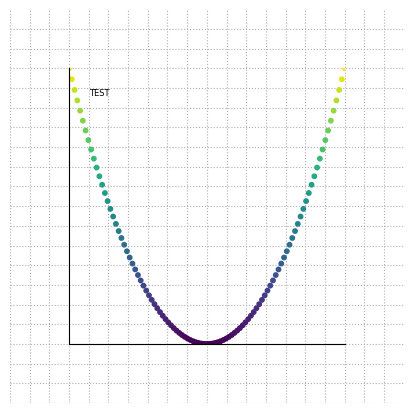

In [21]:
# 3. Create and build the panel
panel = MyPanel(config)
fig = panel()
fig

In [ ]:
plt.close()